# <h1>Coffea <h1>

## Nanoevents

- Different "Schemas" interpret our root files for our convinience.
- NanoAODSchema is used for CMS NanoAOD format
- NanoEventsFactory creates "NanoEvent" objects which are accessed in a "Lazy" fashion

In [429]:
import awkward as ak
import numpy as np
import hist 
from matplotlib.pyplot import plot as plt
from coffea.nanoevents import NanoEventsFactory , NanoAODSchema
file_name = "data/nano_dy.root"
events = NanoEventsFactory.from_root(file_name, schemaclass=NanoAODSchema.v6, metadata={"Datasets":"DYJets"},).events()

In [430]:
events

<NanoEventsArray [<event 1:13889:3749778>, ... ] type='40 * event'>

- Note that this is a NanoEventsArray object , not a uproot.TTree object. It does inherit from uproot.TTree though. NanoAODSchema wraps our arrays to have special and easy to understand methods.

In [431]:
ak.type(events)

40 * event

In [432]:
events.fields

['LHEPart',
 'GenPart',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'FsrPhoton',
 'SV',
 'GenMET',
 'HLT',
 'Flag',
 'Pileup',
 'Muon',
 'PSWeight',
 'LHEPdfWeight',
 'HTXS',
 'run',
 'fixedGridRhoFastjetCentralCalo',
 'LHEReweightingWeight',
 'CaloMET',
 'SoftActivityJetNjets5',
 'GenJetAK8',
 'GenDressedLepton',
 'GenJet',
 'fixedGridRhoFastjetCentral',
 'CorrT1METJet',
 'GenVisTau',
 'HLTriggerFinalPath',
 'Electron',
 'SubJet',
 'LHEWeight',
 'Tau',
 'SoftActivityJetHT',
 'IsoTrack',
 'PuppiMET',
 'Photon',
 'event',
 'SoftActivityJetHT10',
 'OtherPV',
 'Jet',
 'fixedGridRhoFastjetAll',
 'SoftActivityJetNjets10',
 'SubGenJetAK8',
 'SoftActivityJetHT2',
 'SoftActivityJet',
 'btagWeight',
 'genWeight',
 'LHE',
 'SoftActivityJetHT5',
 'TkMET',
 'Generator',
 'HLTriggerFirstPath',
 'LHEScaleWeight',
 'L1',
 'genTtbarId',
 'fixedGridRhoFastjetCentralNeutral',
 'TrigObj',
 'L1simulation',
 'MET',
 'RawMET',
 'PV',
 'FatJet',
 'SoftActivityJetNjets2',
 'L1Reco',
 'ChsMET',
 'luminosityBl

- Most of these fields have their own subfields. Coffea has already grouped this information for us. These groups are called collections.
- `events` as a whole is an awkward array consisting of record objects.
- Each record object stores one collection.

In [433]:
events["Electron"]

<ElectronArray [[], [Electron], ... [], []] type='40 * var * electron'>

In [434]:
events["Electron"].fields

['deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V1Iso',
 'mvaFall17V1noIso',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'cutBased_Fall17_V1',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'lostHits',
 'mvaFall17V1Iso_WP80',
 'mvaFall17V1Iso_WP90',
 'mvaFall17V1Iso_WPL',
 'mvaFall17V1noIso_WP80',
 'mvaFall17V1noIso_WP90',
 'mvaFall17V1noIso_WPL',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'genPartIdx',
 'genPartFlav',

In [435]:
events["Generator"].fields

['binvar', 'scalePDF', 'weight', 'x1', 'x2', 'xpdf1', 'xpdf2', 'id1', 'id2']

In [436]:
events.Generator.fields

['binvar', 'scalePDF', 'weight', 'x1', 'x2', 'xpdf1', 'xpdf2', 'id1', 'id2']

- ? gives the help info

In [437]:
events.Generator.fields?

Type:        property
String form: <property object at 0x7fdc1c282860>
Docstring:  
List of field names or tuple slot numbers (as strings) of the outermost
record or tuple in this array.

If the array contains nested records, only the fields of the outermost
record are shown. If it contains tuples instead of records, its fields
are string representations of integers, such as `"0"`, `"1"`, `"2"`, etc.
The records or tuples may be within multiple layers of nested lists.

If the array contains neither tuples nor records, it is an empty list.

See also #ak.fields.

In [438]:
events.Generator.scalePDF

<Array [95.4, 54.4, 74.8, ... 89.4, 33.9, 92.2] type='40 * float32[parameters={"...'>

- Unlike Uproot where we have to use the method `title` to get the autodocumentation of a branch , we can directly use the `__doc__` method here.
Note that the usual `title` won't work here.

In [439]:
events.Generator.scalePDF.__doc__

'Q2 scale for PDF'

In [440]:
#events.Generator.scalePDF.title

In [441]:
h = hist.Hist.new.Reg(10,0,100).Double()
h.fill(events.Generator.scalePDF) #Here events.Generator.scalePDF was already flat
h

Hist(Regular(10, 0, 100, label='Axis 0'), storage=Double()) # Sum: 40.0

- Based on the collections, some collections have extra methods.
- For example, some collection can utilise the Lorentz vector methods

In [442]:
events.Electron.px #px is not one of the fields 

<Array [[], [-28.9], ... -3.63], [], []] type='40 * var * float32'>

- We can also cast to a Momentum4D object 

In [443]:
ak.with_name(events.Electron , "PtEtaPhiMLorentzVector")

<PtEtaPhiMLorentzVectorArray [[], [{deltaEtaSC: -0.0145, ... [], []] type='40 * ...'>

In [444]:
ak.with_name(events.Electron , "PtEtaPhiMLorentzVector").energy

<Array [[], [94.7], [62.7, ... [8.24], [], []] type='40 * var * float32'>

In [445]:
events.Electron #Lazily accessed

<ElectronArray [[], [Electron], ... [], []] type='40 * var * electron'>

In [446]:
print(events.Electron) #Lazily accessed

[[], [Electron], [Electron, Electron], [Electron, ... [], [Electron], [], []]


In [447]:
ele = events.Electron
print(ele)
print(ak.num(ele))
ele = events.Electron[ak.num(ele) > 0] # to eliminate empty arrays
print(ele)
print(ak.num(ele))
print(ele[:,0].pt) # the leading orders
hist.Hist.new.Reg(10,0,200).Double().fill(ele[:,0].pt)
ak.firsts(events.Electron.pt) # This too gives leading order but with None types for empty arrays

[[], [Electron], [Electron, Electron], [Electron, ... [], [Electron], [], []]
[0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, ... 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
[[Electron], [Electron, Electron], [Electron, ... [Electron], [Electron], [Electron]]
[1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
[29.6, 60.1, 10.7, 9.91, 33.2, 39.8, 6.79, ... 23.1, 27, 28.6, 36.3, 15.6, 7.68]


<Array [None, 29.6, 60.1, ... 7.68, None, None] type='40 * ?float32[parameters={...'>

In [448]:
#delta r between all electrons and leading jets
events.Jet[:,0].delta_r(events.Electron) #note that jets are plenty and hence they have no empty arrays

<Array [[], [3.13], [3.45, ... 0.0858], [], []] type='40 * var * float32'>

In [449]:
# Cartesian is useful for such calculations
print(events.Electron[2])
print(events.Jet[2])
comb = ak.cartesian([events.Jet , events.Electron])
print([str(i) for i in comb[2]])
j , e = ak.unzip(comb)
j.delta_r(e)

[Electron, Electron]
[Jet, Jet, Jet, Jet, Jet]
['(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)']


<Array [[], [3.13, 0.0257, 1.21, ... [], []] type='40 * var * float32'>

In [450]:
# a short hand to do the same is by assigning keys
jet_ele_pairs = ak.cartesian({"jet": events.Jet , "ele": events.Electron })
jet_ele_pairs.jet.delta_r(jet_ele_pairs.ele)

<Array [[], [3.13, 0.0257, 1.21, ... [], []] type='40 * var * float32'>

In [451]:
# to directly get the pair with smallest delta_r ,i.e., the nearest electron to jet
near = events.Jet.nearest(events.Electron)
print(near)
print(near[1]) #same electron repeated all over
print(near[1].pt)
#this preserves the size as expected from a cartesian product

[[None, None, None, None, None], [Electron, ... None, None, None], [None, None]]
[Electron, Electron, Electron, Electron, Electron, Electron, Electron, Electron]
[29.6, 29.6, 29.6, 29.6, 29.6, 29.6, 29.6, 29.6]


In [452]:
#using the minimum function
a = ak.Array([[  1,2,3 ],[  42,4,5,6  ]])
ak.min(a) # This will flatten and find the minimum element

1

In [453]:
ak.min(a, axis = 0) # This will find minimum columnwise

<Array [1, 2, 3, 6] type='4 * ?int64'>

In [454]:
ak.min(a,axis = 1) # This will find minimum in each subarray with depth level  1

<Array [1, 4] type='2 * ?int64'>

In [455]:
# getting position of the minimum is sometimes more fruitful
print(ak.argmin(a, axis= 1))

[0, 1]


In [456]:
#identification flags have new methods built by NanoEvents
print(events.Jet.jetId)
print(events.Jet.jetId.__doc__)
print(events.Jet.isTight)

[[6, 6, 6, 6, 6], [6, 2, 6, 6, 6, 6, 6, 0], ... 6], [6], [6, 6, 0, 6, 6, 6], [6, 6]]
Jet ID flags bit1 is loose (always false in 2017 since it does not exist), bit2 is tight, bit3 is tightLepVeto
[[True, True, True, True, True], [True, ... False, True, True, True], [True, True]]


In [457]:
print(events.Electron.cutBased)
print(events.Electron.cutBased.__doc__)
print(events.Electron.isTight)

[[], [4], [3, 4], [1, 0], [], [0], [0], ... 4], [], [4], [], [4], [], [0], [], []]
cut-based ID Fall17 V2 (0:fail, 1:veto, 2:loose, 3:medium, 4:tight)
[[], [True], [False, True], [False, False], [], ... [], [True], [], [False], [], []]


In [458]:
events.GenPart

<GenParticleArray [[GenParticle, ... GenParticle]] type='40 * var * genParticle'>

In [459]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

In [460]:
events.GenPart.statusFlags.__doc__

'gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR, '

In [461]:
#We can also access the flags and do our required opearation
events.GenPart.hasFlags(["isPrompt","isLastCopy"])

<Array [[True, True, False, ... False, False]] type='40 * var * bool'>

- Nanoevents has precomputed cross references to match the true particle with the signal data.
- pgdIds are used to infer which particles we are talking about
- `events.Electron.matched_gen.pdgId`creates an array of cross links
- 11 means an electron is matched to an electron
- \- 11 means a positron is matched to a positron
- 22 means a photon is matched to an electron
- None means that the identified electron is fake

In [462]:
#!pip install particle

In [463]:
import particle
particle.Particle.from_pdgid(23)

<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>

In [464]:
print(events.Electron.charge)
match = events.Electron.matched_gen.pdgId
print(match)

[[], [1], [1, -1], [1, 1], [], [1], [1], ... [], [-1], [], [1], [], [-1], [], []]
[[], [-11], [-11, 11], [22, None], [], [None, ... 11], [], [-11], [], [None], [], []]


- The parent index gives you the info about what particle is the "Parent" particle of this particle

In [465]:
parents = events.GenPart.parent.pdgId
parents

<Array [[None, None, 1, 1, ... 111, 111, 111]] type='40 * var * ?int32[parameter...'>

In [466]:
parents = events.GenPart[events.GenPart.pdgId == 11].parent.pdgId

In [467]:
def show_info(parent):
    return [[particle.Particle.from_pdgid(element) for element in particles] for particles in parent]
show_info(parents[:3])

[[],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>]]

- We can also know what are the children of parents

In [468]:
child = events.GenPart.parent.children.pdgId
child

<Array [[None, None, [23, 21, ... [22, 22]]] type='40 * var * option[var * ?int3...'>

In [469]:
part = ak.flatten(child) # child is doubly nested
part = part[~ak.is_none(part)] # to remove none types
show_info(part[:3])

[[<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="g", pdgid=21, mass=0.0 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="g", pdgid=21, mass=0.0 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>]]

In [470]:
print(events.GenPart[(abs(events.GenPart.pdgId) == 11)])

[[], [GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle], []]


In [471]:
A = events.GenPart[
    (abs(events.GenPart.pdgId) == 11)
    & events.GenPart.hasFlags(['isPrompt','isLastCopy'])].distinctParent.pdgId
print(A)

[[], [23, 23], [23, 23], [], [], [], [], ... [23, 23], [], [], [], [], [23, 23], []]


In [472]:
 a = events.GenPart[
    (abs(events.GenPart.pdgId) == 11)
    & events.GenPart.hasFlags(['isPrompt', 'isLastCopy'])].parent.pdgId
print(a)

[[], [11, -11], [11, -11], [], [], [], ... -11], [], [], [], [], [-11, 11], []]


In [473]:
A[-7]

<Array [23, 23] type='2 * ?int32[parameters={"__doc__": "PDG id"}]'>

In [474]:
a[-7]

<Array [11, -11] type='2 * ?int32[parameters={"__doc__": "PDG id"}]'>

In [475]:
#dimuon events
mmevents = events[ak.num(events.Muon) == 2]
zmm = mmevents.Muon[:,0] + mmevents.Muon[:,1]
zmm.mass

<Array [94.6, 87.6, 88, 90.4, 89.1, 31.6] type='6 * float32'>

In [476]:
#hist.Hist.new.Reg(100,0,100).Double().fill(zmm.mass)

In [477]:
# A shorter method to do the same
mmevents.Muon.sum(axis = 1).mass

<Array [94.6, 87.6, 88, 90.4, 89.1, 31.6] type='6 * float32'>

In [478]:
# To add your own variables
mmevents["Electron", "myvariable"] = mmevents.Electron.pt + zmm.mass
mmevents.Electron.myvariable

<Array [[], [121], [], [], [], []] type='6 * var * float32'>

## Applying corrections

In [479]:
events

<NanoEventsArray [<event 1:13889:3749778>, ... ] type='40 * event'>

### Coffea lookup_tools

In [480]:
from coffea.lookup_tools import extractor

In [481]:
%%bash
echo "Hello World"

Hello World


In [482]:
# %%bash
# mkdir -p data
# pushd data
# PREFIX=https://raw.githubusercontent.com/CoffeaTeam/coffea/master/tests/samples
# curl -Os $PREFIX/testSF2d.histo.root
# curl -Os $PREFIX/Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi.jec.txt
# curl -Os $PREFIX/Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi.junc.txt
# curl -Os $PREFIX/DeepCSV_102XSF_V1.btag.csv.gz
# popd

#### Opening a root file and Using it as a lookup table

In [483]:
import uproot as ur
file = ur.open("data/testSF2d.histo.root")
print(file.keys())
sc = file["scalefactors_Tight_Electron"]
sc

['scalefactors_Tight_Electron;1']


<TH2F (version 3) at 0x7fd8346053d0>

<img title="scalefactors_Tight_Electron" alt="sc" src="data/Canvas.png">

- The extractor class facilitates the use of coffea lookup_tools
- The extractor class can take in many histograms at once(using wildcards *), here we only need one.
- The evaluator is applies our corrections

In [484]:
ex = extractor()
ex

The usual syntax to add the weights is `ex.add_weight_sets(["<Define a key><space><specify the histogram object name><space><the file>"])`

In [485]:
ex.add_weight_sets(["testSF2d scalefactors_Tight_Electron data/testSF2d.histo.root"])

In [486]:
ex.finalize() # to stop further imports or modifications

In [487]:
evaluator = ex.make_evaluator()
evaluator.keys()

dict_keys(['testSF2d'])

In [488]:
evaluator["testSF2d"]

2 dimensional histogram with axes:
	1: [-2.5   -2.    -1.566 -1.444 -0.8    0.     0.8    1.444  1.566  2.
  2.5  ]
	2: [ 10.  20.  35.  50.  90. 150. 500.]

In [489]:
type(evaluator["testSF2d"])

coffea.lookup_tools.dense_lookup.dense_lookup

- Pass your branches as an argument to this to get the scale factor
- for our case, scale factor depended upon eta(x-axis) and pt(y-axis)
- The resultant scale factor has same size as Electron and has info about what should be the scale factor for each electron depending upon it's eta and pt.

In [490]:
print("Electron eta:", events.Electron.eta)
print("Electron pt:", events.Electron.pt)
scale = evaluator["testSF2d"](events.Electron.eta, events.Electron.pt)
print("Scale factor:", scale)

Electron eta: [[], [1.83], [-0.293, -0.904], [-2.19, 1.65], ... [-0.0595], [], [0.381], [], []]
Electron pt: [[], [29.6], [60.1, 51.7], [10.7, 8.6], [], ... [], [15.6], [], [7.68], [], []]
Scale factor: [[], [0.909], [0.953, 0.972], [0.807, 0.827], ... [0.941], [], [0.946], [], []]


In [491]:
import hist
h = hist.Hist.new.Reg(100,0,100).Double()
h.fill(ak.flatten(events.Electron.E * scale))
h

Hist(Regular(100, 0, 100, label='Axis 0'), storage=Double()) # Sum: 21.0 (25.0 with flow)

#### Buiding and using your own corrections from a histogram

- Lets first construct two different data sets of eta and phi.
- These two datasets may correspond to, for example, from two different generators

In [492]:
import matplotlib.pyplot as plt
import numpy as np

In [493]:
h = hist.Hist.new.StrCat(["gen1", "gen2", "gen2rwt"], name="dataset") #StringCategory Histogram
h

ConstructProxy(Hist, StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'))

In [494]:
h= h.Reg(20, 0, 100 , name = "pt") # adding the pt axis

In [495]:
h= h.Reg(4, -3, 3, name="eta") # adding the eta axis

In [496]:
h = h.Weight()
h

Hist(
  StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'),
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

- Now lets fill this histogram object with random data

In [497]:
h.fill(dataset="gen1",
        pt=np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=10.0, size=10000),
        eta=np.random.normal(scale=1, size=10000)
      )
h.fill(dataset="gen2",
       pt=np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=15.0, size=10000),
       eta=np.random.normal(scale=1.1, size=10000)
      )

Hist(
  StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'),
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=19856, variance=19856) (WeightedSum(value=20000, variance=20000) with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd834628a00>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd8346549d0>, text=[])

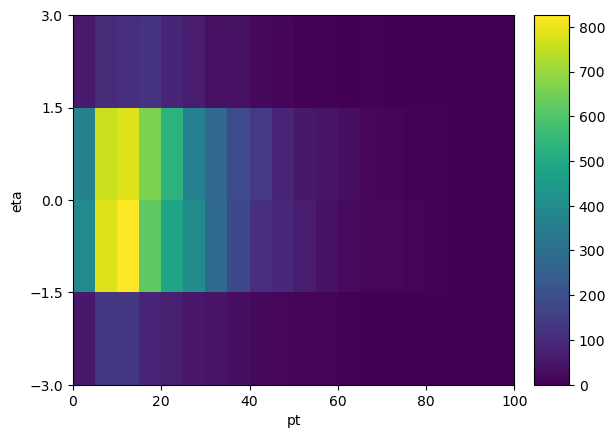

In [498]:
h["gen1",:,:].plot2d() #first 2d histogram

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd83475e160>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd834767ee0>, text=[])

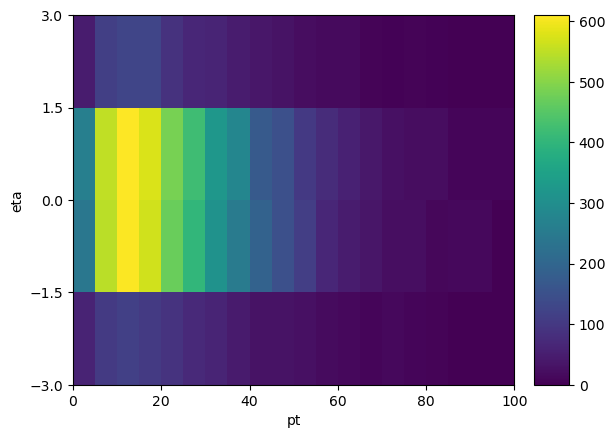

In [499]:
h["gen2",:,:].plot2d() #second 2d histogram (to be corrected)

In [500]:
h["gen2rwt",:,:] #third 2d histogram (not yet filled)

Hist(
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


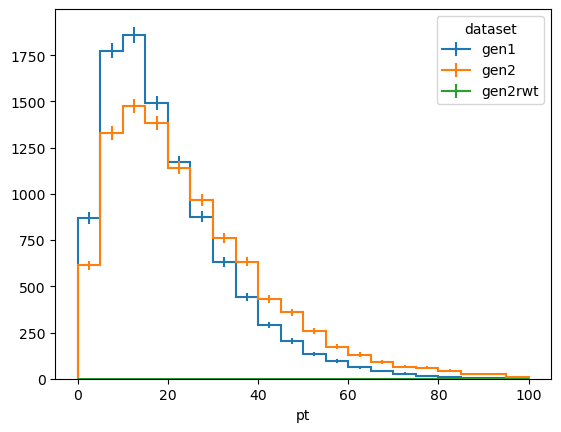

In [501]:
fig, ax= plt.subplots()
h[:,:,sum].plot1d(ax=ax) # plot just the pt
ax.legend(title="dataset")

Now we derive a correction as a function of $p_T$ and $\eta$ to `gen2` such that it agrees with `gen1`. We'll set it to 1 anywhere we run out of statistics for the correction, to avoid divide by zero issues

In [502]:
from coffea.lookup_tools import dense_lookup

In [503]:
num = h["gen1",:,:].values()
den = h["gen2",:,:].values()
num

array([[ 54., 389., 369.,  56.],
       [131., 781., 757., 102.],
       [132., 826., 784., 111.],
       [ 84., 620., 662., 120.],
       [ 71., 481., 530.,  90.],
       [ 51., 395., 361.,  67.],
       [ 42., 279., 274.,  35.],
       [ 32., 183., 186.,  37.],
       [ 21., 110., 136.,  21.],
       [ 16.,  94.,  84.,  10.],
       [  9.,  62.,  53.,   5.],
       [  7.,  38.,  44.,   6.],
       [  4.,  24.,  32.,   2.],
       [  2.,  16.,  16.,   6.],
       [  1.,  16.,   9.,   2.],
       [  1.,   7.,   5.,   1.],
       [  0.,   5.,   6.,   0.],
       [  0.,   3.,   0.,   0.],
       [  1.,   1.,   3.,   0.],
       [  0.,   2.,   1.,   0.]])

In [504]:
sf = np.where(
    (num >  0) & (den > 0) ,
    num / np.maximum(den, 1) * den.sum() / num.sum(),
    1.0
)
sf # to remove non-zeroes

array([[0.92244664, 1.58605708, 1.40613981, 1.20616211],
       [1.26011319, 1.41461804, 1.35872726, 0.89432879],
       [1.12743478, 1.34823886, 1.27339082, 0.87282649],
       [0.80024217, 1.08338824, 1.13870438, 0.95114498],
       [0.79039435, 1.0118116 , 1.08270369, 1.03685862],
       [0.71168418, 0.9735237 , 0.84957278, 1.02126143],
       [0.68217365, 0.89748867, 0.84047254, 0.56847804],
       [0.70455183, 0.71949211, 0.65581615, 0.77997261],
       [0.69354321, 0.57360717, 0.7879856 , 0.54753412],
       [0.52841388, 0.62927666, 0.55855829, 0.33025867],
       [0.37154101, 0.55843739, 0.51991217, 0.23589905],
       [0.4079666 , 0.5792229 , 0.57360717, 0.39631041],
       [0.30485416, 0.50592818, 0.56615772, 0.13210347],
       [0.22017245, 0.45292618, 0.39631041, 1.18893122],
       [0.08256467, 0.68923549, 0.35667937, 0.49538801],
       [0.11008622, 0.30154053, 0.23589905, 0.1981552 ],
       [1.        , 0.45035274, 0.28307886, 1.        ],
       [1.        , 0.22864062,

In [505]:
from coffea.lookup_tools.dense_lookup import dense_lookup

[array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]), array([-3. , -1.5,  0. ,  1.5,  3. ])]
2 dimensional histogram with axes:
	1: [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
	2: [-3.  -1.5  0.   1.5  3. ]



ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fd834562ee0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fd8344f3550>, text=[])

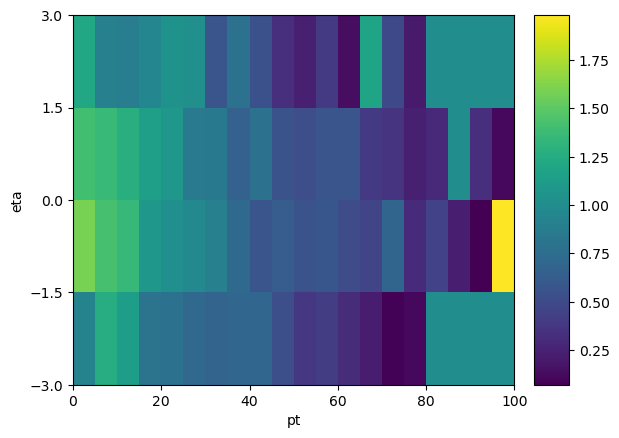

In [506]:
edge = [ax.edges for ax in h.axes[1:]] #get the y-axis and x-axis (z-axis is the 0th element of axes array)
print(edge)
corr = dense_lookup(sf, edge) #corr is the correction histogram; its basically a lookup table
print(corr)
sfhist = hist.Hist(*h.axes[1:], data=sf) #Steal the axes from h
sfhist.plot2d()

- Lets generate a mock data which looks as if from gen 2 and then correct it with corr

In [507]:
ptvals = np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=15.0, size=10000)
etavals = np.random.normal(scale=1.1, size=10000)

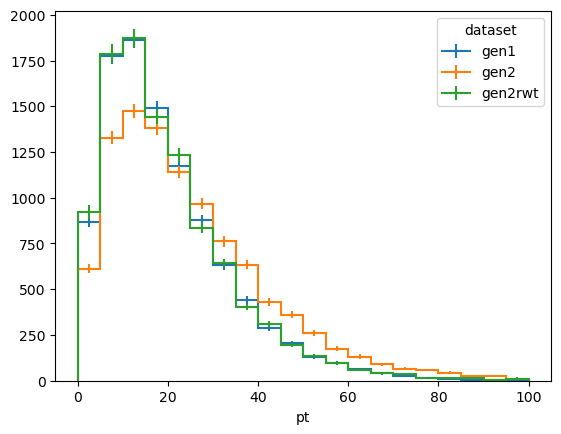

In [508]:
h.fill(
    dataset="gen2rwt",
    pt=ptvals,
    eta=etavals,
    weight=corr(ptvals, etavals)
)

fig, ax = plt.subplots()
h[:, :, sum].plot1d(ax=ax)
ax.legend(title="dataset")

- The agreement between gen1 and gen2rwt shows that the correction has been made

### CMS high-level tools

#### Applying energy scale transformations with jetmet_tools

<u>chatGPT <u>: 

In particle physics, specifically in the context of high-energy particle collisions and experiments conducted at accelerators like the Large Hadron Collider (LHC) at CERN, "AK4" and "AK8" refer to jet clustering algorithms with different cone sizes. Let's break down what this means:

Jet Clustering Algorithm:
In a high-energy particle collision, quarks and gluons are produced as a result of the collision. However, these particles are not observed directly due to a phenomenon called color confinement. Instead, they rapidly combine to form groups of particles known as jets. Jet clustering algorithms are used to group particles that come from the same initial quark or gluon into these jets.

AK4 and AK8:

AK4: This refers to the "Anti-kT with radius 0.4" jet clustering algorithm. The "Anti-kT" part indicates the algorithm's strategy for clustering, and "0.4" represents the size of the jet cone in terms of angular separation. The angular separation is usually measured in units of ΔR, which stands for the difference in rapidity and azimuthal angle. Smaller cone sizes (like 0.4) tend to capture the more collimated, high-energy particles, such as those coming from quarks produced in processes like the strong force.

AK8: This stands for "Anti-kT with radius 0.8" jet clustering algorithm. Similar to AK4, it uses the Anti-kT strategy for clustering, but with a larger cone size of 0.8. Larger cone sizes tend to capture more of the softer, wider-angle particles, which might arise from the decay of heavy particles like W and Z bosons, top quarks, and even hypothetical new particles.

The "Anti-kT" algorithm is a popular choice for jet clustering because it tends to give well-behaved jets that are less sensitive to the presence of additional particles (pileup) in the collision. The "radius" or cone size determines how tightly or broadly the algorithm clusters particles. Smaller cone sizes are more focused and suitable for high-energy quarks, while larger cone sizes are better for reconstructing the broader structure of heavier particles.

These jet clustering algorithms are essential tools for particle physicists to analyze the outcomes of high-energy collisions and to identify and understand the particles produced in these collisions.

In [509]:
from coffea.jetmet_tools import FactorizedJetCorrector, JetCorrectionUncertainty
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory

In [510]:
ext = extractor()
ext.add_weight_sets([
    "* * data/Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi.jec.txt",
    "* * data/Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi.junc.txt",
])
ext.finalize()

- Stars probably represents that, we used the filename as the key and identifier name.

In [511]:
jec_stack_names = [
    "Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi",
    "Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi"
]

evaluator = ext.make_evaluator()

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs) # Takes a dictionary as an input

In [512]:
print(jec_inputs)
print(dir(evaluator))

{'Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi': binned dims: ['JetEta', 'JetPt']
eval vars  : ['JetPt']
parameters : ['p0', 'p1', 'p2', 'p3', 'p4']
formula    : max(0.0001,p0+((JetPt-p1)*(p2+((JetPt-p1)*(p3+((JetPt-p1)*p4))))))
signature  : (JetEta,JetPt)
, 'Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi': binned dims   : ['JetEta']
eval vars     : ['JetPt']
signature     : (JetEta,JetPt)
}
['Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi', 'Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi']


AS IS(I didn't understand): 
Now we prepare some auxilary variables that are used to parameterize the jet energy corrections, such as jet area, mass, and event $\rho$ (mean pileup energy density), and pass all of these into the `CorrectedJetsFactory`:

In [513]:
name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'

jets = events.Jet
    
jets['pt_raw'] = (1 - jets['rawFactor']) * jets['pt']
jets['mass_raw'] = (1 - jets['rawFactor']) * jets['mass']
jets['pt_gen'] = ak.values_astype(ak.fill_none(jets.matched_gen.pt, 0), np.float32)
jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll, jets.pt)[0]
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'
    
events_cache = events.caches[0]
corrector = FactorizedJetCorrector(
    Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi=evaluator['Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi'],
)
uncertainties = JetCorrectionUncertainty(
    Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi=evaluator['Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi']
)

jet_factory = CorrectedJetsFactory(name_map, jec_stack)
corrected_jets = jet_factory.build(jets, lazy_cache=events_cache)

print('starting columns:', set(ak.fields(jets)))
print('new columns:', set(ak.fields(corrected_jets)) - set(ak.fields(jets)))

starting columns: {'pt_gen', 'bRegRes', 'muEF', 'genJetIdxG', 'muonIdx2G', 'mass_raw', 'muonIdxG', 'electronIdx1', 'jercCHPUF', 'nConstituents', 'rho', 'electronIdx2', 'muonIdx2', 'chHEF', 'nMuons', 'jetId', 'puId', 'phi', 'area', 'electronIdx1G', 'btagDeepC', 'mass', 'eta', 'neHEF', 'qgl', 'muonIdx1G', 'cleanmask', 'btagDeepFlavB', 'btagCSVV2', 'pt_raw', 'btagDeepFlavC', 'muonIdx1', 'btagDeepB', 'genJetIdx', 'muonSubtrFactor', 'chEmEF', 'hadronFlavour', 'electronIdxG', 'nElectrons', 'btagCMVA', 'rawFactor', 'pt', 'electronIdx2G', 'neEmEF', 'partonFlavour', 'bRegCorr', 'jercCHF'}
new columns: {'pt_jec', 'mass_jec', 'mass_orig', 'jet_energy_uncertainty_jes', 'jet_energy_correction', 'pt_orig', 'JES_jes'}


Below we show that the corrected jets indeed have a different $p_T$ and mass than we started with

In [514]:
print('untransformed pt ratios', jets.pt/jets.pt_raw)
print('untransformed mass ratios', jets.mass/jets.mass_raw)

print('transformed pt ratios', corrected_jets.pt/corrected_jets.pt_raw)
print('transformed mass ratios', corrected_jets.mass/corrected_jets.mass_raw)

print('JES UP pt ratio', corrected_jets.JES_jes.up.pt/corrected_jets.pt_raw)
print('JES DOWN pt ratio', corrected_jets.JES_jes.down.pt/corrected_jets.pt_raw)

untransformed pt ratios [[1.12, 1.09, 1.2, 1.35, 1.27], [1.03, ... 1.28, 1.1, 1.13, 0.989], [1.13, 0.978]]
untransformed mass ratios [[1.12, 1.09, 1.2, 1.35, 1.27], [1.03, ... 1.28, 1.1, 1.13, 0.989], [1.13, 0.978]]
transformed pt ratios [[1.2, 1.3, 1.46, 2.09, 2.1], [1.09, 1.29, ... 1.84, 1.47, 1.36, 1.16], [1.37, 1.15]]
transformed mass ratios [[1.2, 1.3, 1.46, 2.09, 2.1], [1.09, 1.29, ... 1.84, 1.47, 1.36, 1.16], [1.37, 1.15]]
JES UP pt ratio [[1.22, 1.35, 1.56, 2.34, 2.37], [1.1, ... 2.07, 1.52, 1.41, 1.2], [1.41, 1.17]]
JES DOWN pt ratio [[1.19, 1.25, 1.35, 1.83, 1.83], [1.08, ... 1.6, 1.41, 1.32, 1.13], [1.33, 1.12]]


#### Applying CMS b-tagging corrections with btag_tools
The `coffea.btag_tools` module provides the high-level utility [BTagScaleFactor](https://coffeateam.github.io/coffea/api/coffea.btag_tools.BTagScaleFactor.html#coffea.btag_tools.BTagScaleFactor) which calculates per-jet weights for b-tagging as well as light flavor mis-tagging efficiencies. Uncertainties can be calculated as well.

In [515]:
from coffea.btag_tools import BTagScaleFactor

btag_sf = BTagScaleFactor("data/DeepCSV_102XSF_V1.btag.csv.gz", "medium")

print("SF:", btag_sf.eval("central", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))
print("systematic +:", btag_sf.eval("up", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))
print("systematic -:", btag_sf.eval("down", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))

SF: [[1.52, 1.56, 1.59, 1.6, 1.6], [0.969, 1.57, ... 1.59, 1.6, 1.6, 1.6], [1.6, 1.6]]
systematic +: [[1.72, 1.77, 1.79, 1.8, 1.8], [1.01, 1.78, ... 1.8, 1.8, 1.8, 1.8], [1.8, 1.8]]
systematic -: [[1.31, 1.36, 1.38, 1.4, 1.4], [0.925, 1.37, ... 1.39, 1.4, 1.4, 1.4], [1.4, 1.4]]


### Using Correctionlib

Correction library object can be constructed from the corrections we make earlier and save it in json format.

- correctionlib helps to handle json files in hep style
- rich is a library which enables colourful printing in terminal

In [516]:
import correctionlib, rich
import correctionlib.convert

In [517]:
# without a name, the resulting object will fail validation
sfhist.name = "gen2_to_gen1"
sfhist.label = "out"
clibcorr = correctionlib.convert.from_histogram(sfhist)
clibcorr.description = "Reweights gen2 to agree with gen1"
# set overflow bins behavior (default is to raise an error when out of bounds)
clibcorr.data.flow = "clamp"

cset = correctionlib.schemav2.CorrectionSet(
    schema_version=2,
    description="my custom corrections",
    corrections=[clibcorr],
)
rich.print(cset)

with open("data/mycorrections.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))

CorrectionSet (schema v2)
my custom corrections
📂
└── 📈 gen2_to_gen1 (v0)
    Reweights gen2 to agree with gen1
    Node counts: MultiBinning: 1
    ╭──────────── ▶ input ─────────────╮ ╭──────────── ▶ input ────────────╮
    │ pt (real)                        │ │ eta (real)                      │
    │ pt                               │ │ eta                             │
    │ Range: [0.0, 100.0), overflow ok │ │ Range: [-3.0, 3.0), overflow ok │
    ╰──────────────────────────────────╯ ╰─────────────────────────────────╯
    ╭─── ◀ output ───╮
    │ out (real)     │
    │ No description │
    ╰────────────────╯

In [518]:
ceval = cset.to_evaluator()

ceval["gen2_to_gen1"].evaluate(ptvals, etavals)

array([1.27339082, 1.08338824, 1.27339082, ..., 0.62927666, 1.26011319,
       0.62927666])

In [519]:
def myJetSF(jets):
    j, nj = ak.flatten(jets), ak.num(jets)
    sf = ceval["gen2_to_gen1"].evaluate(np.array(j.pt), np.array(j.eta))
    return ak.unflatten(sf, nj)

myJetSF(events.Jet)

<Array [[1, 0.33, 1.02, 0.951, ... [0.8, 1.14]] type='40 * var * float64'>

- Pydantic versions mismatched in my device and coffea casa
- My device has ver 2 , coffea-casa at Nebraska has ver 1

## Analysis tools and Accumulators

- Accumulators relate to the eventual output of an analysis which is usually the output of coffea processors.

In [520]:
#Lets load a sample file
import numpy as np
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
fname = "data/nano_dy.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema.v6,
    metadata={"dataset":"DYJets"},
).events()

In [521]:
# lets also load a correction table
from coffea.lookup_tools import extractor
ext = extractor()
ext.add_weight_sets(["* * data/testSF2d.histo.root"])
ext.finalize()
evaluator = ext.make_evaluator()
evaluator.keys()

dict_keys(['scalefactors_Tight_Electron', 'scalefactors_Tight_Electron_error'])

### Weights

-  Event weights are used to scale the contribution of individual events in an analysis to better represent the overall physical processes being studied.

Here's a breakdown of why event weights are used and how they work:

__Detector Efficiency and Luminosity__: Particle detectors may not capture every particle or interaction with 100% efficiency. Event weights are applied to compensate for this by adjusting the contribution of each event based on the detector's known efficiency for detecting specific particles or interactions. Luminosity, which represents the rate of particle collisions, is also taken into account to scale the event rates.

__Theoretical Predictions__: In some cases, researchers use theoretical predictions to estimate the expected number of events for a particular process. If the theoretical prediction doesn't match the experimental data perfectly, event weights can be applied to scale the theoretical prediction to match the data better.

__Monte Carlo Simulations__: Monte Carlo simulations are used to predict the outcomes of particle collisions and detector responses based on theoretical models. These simulations may not perfectly match the real data due to uncertainties in modeling. Event weights are used to adjust the simulation to better match the data, accounting for these discrepancies.

__Background Subtraction__: In many analyses, distinguishing between signal and background events is crucial. Event weights can be applied to adjust the contribution of background events to accurately subtract them from the data, leaving behind the signal of interest.

__Data-to-Data Comparisons__: In some cases, researchers compare data from different periods or datasets that have different characteristics, such as detector configurations or luminosities. Event weights can be used to make the datasets more comparable, allowing for meaningful comparisons.

` Coffea.analysis_tools.Weights ` is a container for event weights and associated systematic shifts, which helps track the product of the weights (i.e. the total event weight to be used for filling histograms) as well as systematic variations to that product.

In [522]:
from coffea.analysis_tools import Weights

In [523]:
weights = Weights(len(events))
weights

In [524]:
weights.add("alphaS",
            weight=np.ones(len(events)),
            weightUp=events.LHEPdfWeight[:, 32],
            weightDown=events.LHEPdfWeight[:,31])
# in NanoAOD, the generator weights are already stored with respect to nominal
# 31 => alphas(MZ)=0.1165 central value; 32 => alphas(MZ)=0.1195
# per https://lhapdfsets.web.cern.ch/current/PDF4LHC15_nnlo_30_pdfas/PDF4LHC15_nnlo_30_pdfas.info
# which was found by looking up the LHA ID in events.LHEPdfWeight.__doc__

In [525]:
events.LHEPdfWeight

<Array [[0.983, 0.995, 1.02, ... 0.949, 0.96]] type='40 * [var * float32[paramet...'>

In [526]:
events.LHEPdfWeight.__doc__

'LHE pdf variation weights (w_var / w_nominal) for LHA IDs 91400 - 91432'

In [527]:
#Lets construct an per electron weight set
eleSF = evaluator["scalefactors_Tight_Electron"](events.Electron.eta, events.Electron.pt)
eleSF 

<Array [[], [0.909], ... 0.946], [], []] type='40 * var * float32'>

In [528]:
eleSFerror = evaluator["scalefactors_Tight_Electron_error"](events.Electron.eta, events.Electron.pt)
eleSFerror

<Array [[], [0.0176], ... 0.0257], [], []] type='40 * var * float64'>

In [529]:
#Note that the event weight is the product of the per electron weight in each event
weights.add(
    "eleSF",
    weight=ak.prod(eleSF, axis=1),
    weightUp=ak.prod(eleSF + eleSFerror, axis=1),
)

In [530]:
weights.weight()

array([1.        , 0.90893763, 0.92609012, 0.66741443, 1.        ,
       1.00775194, 0.88245934, 1.        , 1.        , 0.95345747,
       1.        , 0.98976982, 0.98976982, 1.        , 1.        ,
       0.92748737, 0.95345747, 1.        , 0.75874597, 1.        ,
       0.8419171 , 0.95453954, 1.        , 1.        , 1.        ,
       0.94072163, 1.        , 0.86332178, 1.        , 0.92748737,
       1.        , 0.98199672, 1.        , 0.90780139, 1.        ,
       0.94072163, 1.        , 0.9458763 , 1.        , 1.        ])

In [531]:
weights.weightStatistics # Shows some quick statistics about the weights

{'alphaS': WeightStatistics(sumw=40.0, sumw2=40.0, minw=1.0, maxw=1.0, n=40),
 'eleSF': WeightStatistics(sumw=38.26972579956055, sumw2=36.81547546386719, minw=0.6674144268035889, maxw=1.0077519416809082, n=40)}

In [532]:
weights.weight("eleSFUp") # eleSFUp is one variation of the eleSF group

array([1.        , 0.92656372, 0.96061038, 0.6973979 , 1.        ,
       1.03501827, 0.89257917, 1.        , 1.        , 0.95818729,
       1.        , 1.01703614, 1.01703614, 1.        , 1.        ,
       0.94511347, 0.95818729, 1.        , 0.79692281, 1.        ,
       0.86339677, 0.98245376, 1.        , 1.        , 1.        ,
       0.96646259, 1.        , 0.87344161, 1.        , 0.94511347,
       1.        , 0.99707836, 1.        , 0.91684047, 1.        ,
       0.96646259, 1.        , 0.97161726, 1.        , 1.        ])

In [533]:
weights.variations  #This lists down all the variations

{'alphaSDown', 'alphaSUp', 'eleSFDown', 'eleSFUp'}

In [534]:
for variation in weights.variations :
    print(variation+": ", weights.weight(variation))

alphaSUp:  [0.98144531 0.8593688  0.91057427 0.64920555 0.94842529 1.0808238
 0.94687715 0.92419434 0.9989624  0.95758928 0.99179077 0.98937715
 0.95630226 0.97412109 1.03106689 0.93382762 0.88496264 1.02032471
 0.73718858 1.05108643 0.83549378 0.99619577 1.01715088 0.99853516
 0.93157959 0.93403254 0.99099731 0.88777132 0.96862793 0.93195951
 1.0100708  0.94372737 1.0355835  0.9589982  0.94726562 0.93041526
 1.00628662 0.92058981 1.02166748 0.95999146]
alphaSDown:  [0.97720337 0.84533308 0.90836983 0.66057082 0.95932007 1.06833761
 0.94822368 0.92919922 0.97702026 0.95302102 0.98477173 0.97817095
 0.94397846 1.00805664 1.02215576 0.95211243 0.99524107 0.96365356
 0.77500084 1.01397705 0.81614675 1.00621657 1.0559082  0.97427368
 0.90606689 0.91827155 0.97360229 0.87739081 0.95898438 0.92208118
 0.99734497 0.92697517 1.03198242 0.96392949 0.92541504 0.91775479
 0.99179077 0.95667213 1.00036621 0.94921875]
eleSFDown:  [1.         0.89164684 0.89281037 0.63872005 1.         0.98120391
 0

- This class is the cuts(or more appropriately, selections) manager. It stores boolean data and is designed for a more efficient CPU usage.
- In the following example we will utilise this class for Z study.

### Packed Selection

In [535]:
from coffea.analysis_tools import PackedSelection

In [536]:
selection = PackedSelection()
# Usual syntax :
# first argument is the key or label ,
# second argument should be a 1D numpy array or an Awkward Array
selection.add("twoElectron", ak.num(events.Electron) == 2)
selection.add("eleOppSign", ak.sum(events.Electron.charge , axis = 1) == 0) #Note that this makes sense only along with twoElectron condition
selection.add("noElectron", ak.num(events.Electron) == 0)
#Similarly, lets add for Muons
selection.add("twoMuon", ak.num(events.Muon) == 2)
selection.add("muOppSign", ak.sum(events.Muon.charge, axis=1) == 0)
selection.add("noMuon", ak.num(events.Muon) == 0)

In [537]:
print(selection.names)

['twoElectron', 'eleOppSign', 'noElectron', 'twoMuon', 'muOppSign', 'noMuon']


In [538]:
# Let impose that at least one: either electron or muon is about pt > 20 GeV

In [539]:
EleIs20 = ak.any(events.Electron.pt >=20.0, axis = 1)
print(EleIs20)
MuIs20 = ak.any(events.Muon.pt >=20.0, axis = 1)
print(MuIs20)
selection.add(
    "leadPt20",
    ak.any(events.Electron.pt >= 20.0, axis=1) | ak.any(events.Muon.pt >= 20.0, axis=1)
)

[False, True, True, False, False, False, ... False, False, False, False, False]
[False, False, False, False, True, True, ... False, False, False, False, False]


- We can evaluate different conditions (with `AND`) with the `all` method.
- Such Boolean arrays are also called a Boolean Mask.

In [540]:
selection.all("twoElectron","noMuon","leadPt20")
# The event where we have exactly two electrons and no Muons , 
# with at least one of the electrons having pt > 20

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

We can also be more specific and require that a specific set of selections have a given value (with the unspecified ones allowed to be either true or false) using `selection.require`

In [541]:
selection.require(twoElectron=True , noMuon=True , eleOppSign = False)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

<u>An N-1 style selection can also be made</u> :  
- An N-1 selection is a technique where all selection criteria except one are applied. The one variable that is left out is the focus of the analysis. This means that you're looking at the effect of every other selection criterion except the variable of interest. 
- The N-1 technique helps assess systematic uncertainties in your analysis. If the efficiency or purity varies significantly as a function of the omitted variable, it could indicate that your analysis is sensitive to the variable, and you may need to understand its impact better.

In [542]:
CutSet = {"twoElectron", "noMuon", "leadPt20"}
print(*(CutSet - {"noMuon"})) # star gives back the values

leadPt20 twoElectron


In [543]:
selection.all(*CutSet).sum() #Sum gives back the number of True events

3

In [544]:
for cut in CutSet :
    nev = selection.all(*(CutSet - {cut})).sum()
    print(f"Events passing all the cuts, ignoring {cut} : {nev}")
nev_all = selection.all(*CutSet).sum()
print(f"Events passing all the cuts: {nev_all}")

Events passing all the cuts, ignoring leadPt20 : 5
Events passing all the cuts, ignoring noMuon : 3
Events passing all the cuts, ignoring twoElectron : 10
Events passing all the cuts: 3


### Accumulate 

Accumulate is essentially a union operation which can take in different types of data types and objects.

In [545]:
from coffea.processor import accumulate

In [546]:
accumulate([ {"a": 0 , "Place":"Kualalumpur", "Languages": {"Mandarin", "English"} } , 
            {"a": 1 , "Place":"Shanghai", "Rent": 1000000} ,
            {"b": 1, "Rent": 10000 , "Languages":{"Cantonese","Mandarin"}} ,
            {"a":2}
           ])

{'a': 3,
 'Place': 'KualalumpurShanghai',
 'Languages': {'Cantonese', 'English', 'Mandarin'},
 'Rent': 1010000,
 'b': 1}

- The `a` values were summed up
- `Place` stayed with initial assignment
- `Languages` sets were unioned
- `Rent` was also added up
- The `b` value was carried as it is since it occured only once

Anything that is addabble can be input into an accumulator

In [547]:
def makehist():
    return hist.Hist.new.Reg(10,0,1).Double()

H = accumulate([
    makehist().fill([0.1,0.1,0.3]),
    makehist().fill([0.1,0.3,0.5])
])
print(H.values())
H

[0. 3. 0. 2. 0. 1. 0. 0. 0. 0.]


Hist(Regular(10, 0, 1, label='Axis 0'), storage=Double()) # Sum: 6.0

### Creating a $Z$ peak

Let's build an output accumulator that stores, per dataset:
 - the sum of weights for the events processed, to use for later luminosity-normalizing the yields;
 - a histogram of the dilepton invariant mass, with category axes for various selection regions of interest and  systematics; and
 - the weight statistics, for debugging purposes

In [548]:
#Lets define some regions of our dataset in a dictionary pf dictionaries!
regions = {
    "DiElectron_OS": {"twoElectron":True , "noMuon":True , "leadPt20": True , "eleOppSign": True },
    "DiElectron_SS": {"twoElectron":True , "noMuon":True , "leadPt20": True , "eleOppSign": False },
    "DiMuon_OS": {"twoMuon": True, "noElectron": True, "leadPt20": True, "muOppSign": True},
    "DiMuon_SS": {"twoMuon": True, "noElectron": True, "leadPt20": True, "muOppSign": True}
}

In [549]:
# Not lets create a histgram stack
masshist = (
    hist.Hist.new
    .StrCat(regions.keys(), name="region")
    .StrCat(["nominal"] + list(weights.variations), name="systematic")
    .Reg(60, 60, 120, name="mass", label="$m_{ll}$ [GeV]")
    .Weight()
)
masshist

Hist(
  StrCategory(['DiElectron_OS', 'DiElectron_SS', 'DiMuon_OS', 'DiMuon_SS'], name='region'),
  StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
  Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [550]:
masshist.axes[:]

(StrCategory(['DiElectron_OS', 'DiElectron_SS', 'DiMuon_OS', 'DiMuon_SS'], name='region'),
 StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
 Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'))

In [551]:
masshist["DiElectron_OS",:,:]

Hist(
  StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
  Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [555]:
for region, cuts in regions.items() :
    goodevent = selection.require(**cuts)# The double star is used to extract info from a dictionary
    
    if region.startswith("DiElectron") :
        mass = events.Electron[goodevent].sum().mass #Equivalent to summing LorentzVectors and finding Invariant mass
    elif region.startswith("DiMuon") :
        mass = events.Muon[goodevent].sum().mass
    
    masshist.fill(
        region=region,
        systematic="nominal",
        mass=mass,
        weight=weights.weight()[goodevent],
    )
    
    for syst in weights.variations:
        masshist.fill(
            region=region,
            systematic=syst,
            mass=mass,
            weight=weights.weight(syst)[goodevent],
        )

output ={
    events.metadata["dataset"] :{
        "sumw":ak.sum(events.genWeight),
        "mass": masshist,
        "weightStatistics": weights.weightStatistics
    }
}

output

{'DYJets': {'sumw': 578762.44,
  'mass': Hist(
    StrCategory(['DiElectron_OS', 'DiElectron_SS', 'DiMuon_OS', 'DiMuon_SS'], name='region'),
    StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
    Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'),
    storage=Weight()) # Sum: WeightedSum(value=212.035, variance=204.941),
  'weightStatistics': {'alphaS': WeightStatistics(sumw=40.0, sumw2=40.0, minw=1.0, maxw=1.0, n=40),
   'eleSF': WeightStatistics(sumw=38.26972579956055, sumw2=36.81547546386719, minw=0.6674144268035889, maxw=1.0077519416809082, n=40)}}}

- If we were to run on many files , we would accumulate this output

In [556]:
accumulate([output,output])

{'DYJets': {'sumw': 1157524.9,
  'mass': Hist(
    StrCategory(['DiElectron_OS', 'DiElectron_SS', 'DiMuon_OS', 'DiMuon_SS'], name='region'),
    StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
    Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'),
    storage=Weight()) # Sum: WeightedSum(value=424.07, variance=409.882),
  'weightStatistics': {'alphaS': WeightStatistics(sumw=80.0, sumw2=80.0, minw=1.0, maxw=1.0, n=80),
   'eleSF': WeightStatistics(sumw=76.5394515991211, sumw2=73.63095092773438, minw=0.6674144268035889, maxw=1.0077519416809082, n=80)}}}

In [558]:
output.keys()

dict_keys(['DYJets'])

In [561]:
output["DYJets"].keys()

dict_keys(['sumw', 'mass', 'weightStatistics'])

In [563]:
output["DYJets"]["mass"]

Hist(
  StrCategory(['DiElectron_OS', 'DiElectron_SS', 'DiMuon_OS', 'DiMuon_SS'], name='region'),
  StrCategory(['nominal', 'alphaSUp', 'alphaSDown', 'eleSFDown', 'eleSFUp'], name='systematic'),
  Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=212.035, variance=204.941)

In [565]:
output["DYJets"]["mass"][sum, "nominal", :]

Hist(Regular(60, 60, 120, name='mass', label='$m_{ll}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=42.8902, variance=41.9105)

## Processors